In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
!ls -A

.ipynb_checkpoints testX.csv          trainX.csv
Untitled.ipynb     testY.csv          trainY.csv


In [9]:
train_x = pd.read_csv('trainX.csv',header=None)
train_y = pd.read_csv('trainY.csv',header=None)
test_x = pd.read_csv('testX.csv',header=None)
test_y = pd.read_csv('testY.csv',header=None)

In [11]:
train_x

,0,1,2,3,4,5,6,7
0,853,-734,-2722,398.368639,-56.902627,-725.334524,-986.972671,-1052.021734
1,-734,-2722,-6685,-56.902627,-725.334524,-986.972671,-1052.021734,-2765.264072
2,-2722,-6685,-13040,-725.334524,-986.972671,-1052.021734,-2765.264072,-4095.264878
3,-6685,-13040,-17613,-986.972671,-1052.021734,-2765.264072,-4095.264878,-1355.126887
4,-13040,-17613,-17250,-1052.021734,-2765.264072,-4095.264878,-1355.126887,2270.976732
5,-17613,-17250,-16117,-2765.264072,-4095.264878,-1355.126887,2270.976732,450.470377
6,-17250,-16117,-15197,-4095.264878,-1355.126887,2270.976732,450.470377,-236.775621
7,-16117,-15197,-13853,-1355.126887,2270.976732,450.470377,-236.775621,2.219785
8,-15197,-13853,-11468,2270.976732,450.470377,-236.775621,2.219785,1025.534077
9,-13853,-11468,-12590,450.470377,-236.775621,2.219785,1025.534077,-2057.030098


In [44]:
trainX = train_x.values
trainY = train_y[0].values
testX = test_x.values
testY = test_y[0].values

In [47]:
with tf.device('/gpu:0'):
    
    X = tf.placeholder(tf.float32, shape=[None, 8])
    Y = tf.placeholder(tf.float32, shape=[None, 1])
    lr = tf.placeholder(tf.float32)
    
    W1 = tf.Variable(tf.random_normal([8, 10]), name='weight1')
    b1 = tf.Variable(tf.random_normal([10]), name='bias1')
    
    W2 = tf.Variable(tf.random_normal([10, 10]), name='weight2')
    b2 = tf.Variable(tf.random_normal([10]), name='bias2')

    W3 = tf.Variable(tf.random_normal([10, 1]), name='weight3')
    b3 = tf.Variable(tf.random_normal([1]), name='bias3')
    
    H1 = tf.matmul(X,W1) + b1 # Hidden Layer 1
    H2 = tf.matmul(H1,W2) + b2 # Hidden Layer 2
    hypothesis = tf.matmul(H2,W3) + b3
    
    # Simplified cost/loss function
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    # Minimize
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)

In [124]:
batch_size = 30
lrt = 3e-8

In [ ]:
cost_ = []
# Launch the graph in a session.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

batch_num = int(trainX.shape[0] / batch_size)

for epoch in range(5000):
    
    inx = np.random.permutation(trainX.shape[0])
    train_X, train_Y = trainX[inx], trainY[inx].reshape(-1,1)
    avg_cost = 0
    
    if epoch%500==0: # learning rate
        lrt = lrt/1.5
        
    for i in range(batch_num):
        x_batch = train_X[i*batch_size:(i+1)*batch_size]
        y_batch = train_Y[i*batch_size:(i+1)*batch_size]
        cost_val, hy_val, _ = sess.run([cost, hypothesis, optimizer], feed_dict={X: x_batch, Y: y_batch, lr:lrt})
        avg_cost += cost_val / batch_num
    if epoch % 100 == 0:
        cost_.append(avg_cost)
        print("%.4d" % epoch, "Cost: ", avg_cost)        

0000 Cost:  17101080.7969
0100 Cost:  444158.276338
0200 Cost:  428486.003743
0300 Cost:  420279.001965
0400 Cost:  411806.33968


In [118]:
cost_

[97448906.383233517,
 2666610.7050898201,
 1514793.9416167659,
 1208518.2361526955,
 1086377.0385479042,
 1014709.758420659,
 986254.3333645208,
 960843.36536302452,
 937095.33551646699,
 915096.82335329277]

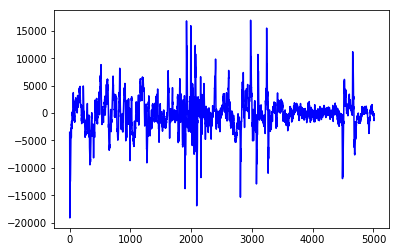

In [110]:
plt.plot(sess.run(hypothesis, feed_dict={X:trainX}),'b')
plt.show()

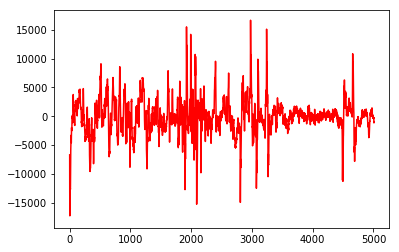

In [111]:
plt.plot(trainY,'r')
plt.show()

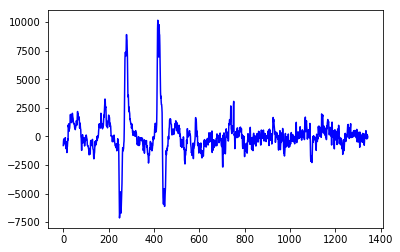

In [112]:
plt.plot(sess.run(hypothesis, feed_dict={X:testX}),'b')
plt.show()

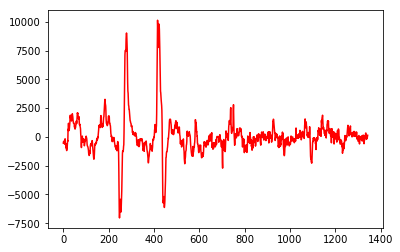

In [113]:
plt.plot(testY,'r')
plt.show()

In [114]:
def r_square(y,y_hat):
    y_bar = np.mean(y)
    ssreg = np.sum((y_hat-y_bar)**2)
    sstot = np.sum((y-y_bar)**2)
    result = ssreg / sstot
    return result

In [115]:
r_square(y=trainY, y_hat=sess.run(hypothesis, feed_dict={X:trainX}))

0.95702529090598221

In [116]:
r_square(y=testY, y_hat=sess.run(hypothesis, feed_dict={X:testX}))

0.95323454070330627